# Classifying Non-Linear Data using Neural Nets

The notebook contains the following elements - 

* Generation of Spiral Dataset
* Classification with a Softmax Classifier
* Classifier with a 2-layer Neural Net

In [7]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
import pickle
from scipy.stats import mode
import time

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Generation of Spiral Dataset

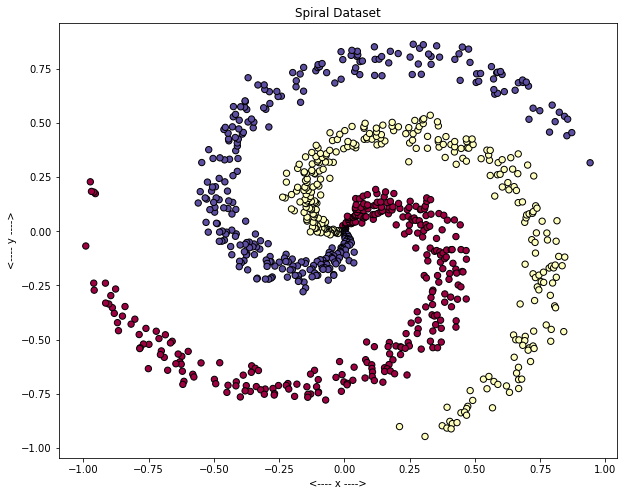

In [24]:
N = 300 # Number of points per class
D = 2   # Number of dimensions in the data
K = 3   # Number of classes

X = np.zeros((N*K,D)) # Data matrix (number of total points x Number of dimensions
y = np.zeros(N*K, dtype='uint8') # Labels for class

for j in xrange(K):
    i = range(N*j, N*(j+1))
    r = np.linspace(0.0,1,N) # radius of point
    t = np.linspace(4.5*j, 4.5*(j+1), N) + np.random.randn(N)*0.23 # theta of point
    X[i] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[i] = j
    
# Visualizing data
plt.scatter(X[:,0], X[:,1], c = y, s = 40, cmap = plt.cm.Spectral, edgecolors = 'black')
plt.title("Spiral Dataset")
plt.xlabel("<---- x ---->")
plt.ylabel("<---- y ---->")
plt.show()

## 2. SGD with a Softmax Classifier

In [25]:
from classifiers import softmax_classifier

sfm = softmax_classifier(D, K)

loss = sfm.SGD(X, y, 1e-0, 1e-3, 3000, 32, False)

print("Final Loss : ", loss)

('Final Loss : ', 0.86821028465607264)


In [26]:
f = np.dot(X, sfm.W) + sfm.b
predicted = np.argmax(f, axis=1)

print("Training Accuracy : ", np.mean(predicted == y))

('Training Accuracy : ', 0.4622222222222222)


#### Decision Boundary Plotting

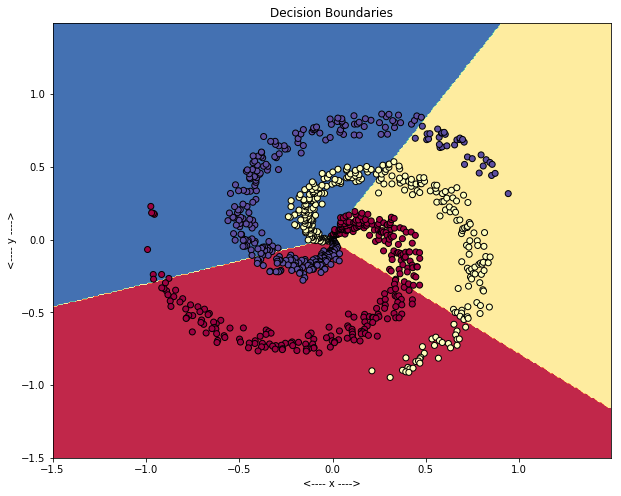

In [27]:
xx, yy = np.meshgrid(np.arange(-1.5,1.5,0.01), np.arange(-1.5,1.5,0.01))

X_plane = np.c_[xx.ravel(), yy.ravel()]

f_plane = np.dot(X_plane, sfm.W) + sfm.b
predicted_plane = np.argmax(f_plane, axis=1)

# Visualizing data
plt.contourf(xx, yy, predicted_plane.reshape(xx.shape), cmap = plt.cm.Spectral)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors = 'black')
plt.title("Decision Boundaries")
plt.xlabel("<---- x ---->")
plt.ylabel("<---- y ---->")
plt.show()

## 3. SGD with a 1 Layer Neural Net

In [ ]:
from classifiers import neural_net

nn = neural_net([100], D, K)

loss = nn.SGD(X, y, 1e-0, 1e-3, 9000, 64, False)

print("Final Loss : ", loss)

In [22]:
f = X
for i in range(nn.num_layers-1):
    f = np.maximum(0, np.dot(f, nn.W[i]) + nn.b[i])

    # Output layer doesn't have activation fn applied
f = np.dot(f, nn.W[-1]) + nn.b[-1]

predicted = np.argmax(f, axis=1)

print("Training Accuracy : ", np.mean(predicted == y))

('Training Accuracy : ', 0.82999999999999996)


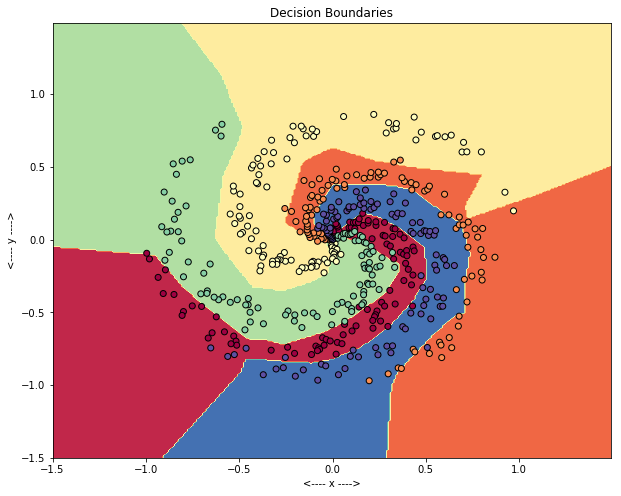

In [23]:
xx, yy = np.meshgrid(np.arange(-1.5,1.5,0.01), np.arange(-1.5,1.5,0.01))

X_plane = np.c_[xx.ravel(), yy.ravel()]

f = X_plane
for i in range(nn.num_layers-1):
    f = np.maximum(0, np.dot(f, nn.W[i]) + nn.b[i])

# Output layer doesn't have activation fn applied
f = np.dot(f, nn.W[-1]) + nn.b[-1]

predicted_plane = np.argmax(f, axis=1)

# Visualizing data
plt.contourf(xx, yy, predicted_plane.reshape(xx.shape), cmap = plt.cm.Spectral)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors = 'black')
plt.title("Decision Boundaries")
plt.xlabel("<---- x ---->")
plt.ylabel("<---- y ---->")
plt.show()